In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# =============================
# 1. Define CSV Paths
# =============================
csv_paths = {
"LLama-3B": {
"TF": {
"1hop": "LLama-3B/data/1hop_true_and_false.csv",
"2hop": "LLama-3B/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "LLama-3B/data/1hop_MCQ.csv",
"2hop": "LLama-3B/data/2hop_MCQ.csv",
}
},
"LLama-8B": {
"TF": {
"1hop": "LLama-8B/verified/data/1hop_true_and_false.csv",
"2hop": "LLama-8B/verified/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "LLama-8B/verified/data/1hop_MCQ.csv",
"2hop": "LLama-8B/verified/data/2hop_MCQ.csv",
}
},
"LLama-70B": {
"TF": {
"1hop": "LLama-70B/verified/data/1hop_true_and_false.csv",
"2hop": "LLama-70B/verified/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "LLama-70B/verified/data/1hop_MCQ.csv",
"2hop": "LLama-70B/verified/data/2hop_MCQ.csv",
}
},
"Mistral-7B": {
"TF": {
"1hop": "Mistral-7B/verified/data/1hop_true_and_false.csv",
"2hop": "Mistral-7B/verified/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "Mistral-7B/verified/data/1hop_MCQ.csv",
"2hop": "Mistral-7B/verified/data/2hop_MCQ.csv",
}
},
"Mistral-8x7B": {
"TF": {
"1hop": "Mistral-8x7B/verified/data/1hop_true_and_false.csv",
"2hop": "Mistral-8x7B/verified/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "Mistral-8x7B/verified/data/1hop_MCQ.csv",
"2hop": "Mistral-8x7B/verified/data/2hop_MCQ.csv",
}
},
"GPT-5-mini": {
"TF": {
"1hop": "GPT-5-mini/verified/data/1hop_true_and_false.csv",
"2hop": "GPT-5-mini/verified/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "GPT-5-mini/verified/data/1hop_MCQ.csv",
"2hop": "GPT-5-mini/verified/data/2hop_MCQ.csv",
}
},
"Gemma-1B": {
"TF": {
"1hop": "Gemma-1B/data/1hop_true_and_false.csv",
"2hop": "Gemma-1B/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "Gemma-1B/data/1hop_MCQ.csv",
"2hop": "Gemma-1B/data/2hop_MCQ.csv",
}
},
"Gemma-4B": {
"TF": {
"1hop": "Gemma-4B/data/1hop_true_and_false.csv",
"2hop": "Gemma-4B/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "Gemma-4B/data/1hop_MCQ.csv",
"2hop": "Gemma-4B/data/2hop_MCQ.csv",
}
},
"Gemma-12B": {
"TF": {
"1hop": "Gemma-12B/data/1hop_true_and_false.csv",
"2hop": "Gemma-12B/data/2hop_true_and_false.csv",
},
"MCQ": {
"1hop": "Gemma-12B/data/1hop_MCQ.csv",
"2hop": "Gemma-12B/data/2hop_MCQ.csv",
}
},
}

In [3]:
# Set publication-quality parameters
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['font.family'] = 'sans-serif'

In [4]:
# =============================
# 2. Metric Calculators
# =============================
def calculate_tf_metrics(df, model_name):
    metrics = {}
    valid_mask = ~pd.isna(df['answer']) & ~pd.isna(df[model_name])
    y_true = df.loc[valid_mask, 'answer'].astype(str).str.lower()
    y_pred = df.loc[valid_mask, model_name].astype(str).str.lower()
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    return metrics

def calculate_mcq_metrics(df, model_name):
    metrics = {}
    valid_mask = ~pd.isna(df['standardized_answer']) & ~pd.isna(df[model_name])
    y_true = df.loc[valid_mask, 'standardized_answer'].astype(str)
    y_pred = df.loc[valid_mask, model_name].astype(str)
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    return metrics

In [5]:
# =============================
# 3. Collect All Metrics
# =============================
all_results = []

for model, qtypes in csv_paths.items():
    for qtype, hops in qtypes.items():
        for hop, path in hops.items():
            print(f"Processing: {model} - {qtype} - {hop}")
            
            try:
                df = pd.read_csv(path)
                
                if qtype == "TF":
                    rag_metrics = calculate_tf_metrics(df, 'with_context_parsed')
                    simple_metrics = calculate_tf_metrics(df, 'without_context_parsed')
                else:
                    rag_metrics = calculate_mcq_metrics(df, 'with_context_parsed')
                    simple_metrics = calculate_mcq_metrics(df, 'without_context_parsed')
                
                all_results.append({
                    'model': model,
                    'qtype': qtype,
                    'hop': hop,
                    'RAG': rag_metrics['accuracy'],
                    'Simple': simple_metrics['accuracy'],
                    'Improvement': rag_metrics['accuracy'] - simple_metrics['accuracy']
                })
            except FileNotFoundError:
                print(f"  File not found: {path}")
                all_results.append({
                    'model': model,
                    'qtype': qtype,
                    'hop': hop,
                    'RAG': 0,
                    'Simple': 0,
                    'Improvement': 0
                })
            except Exception as e:
                print(f"  Error processing {path}: {str(e)}")
                all_results.append({
                    'model': model,
                    'qtype': qtype,
                    'hop': hop,
                    'RAG': 0,
                    'Simple': 0,
                    'Improvement': 0
                })

results_df = pd.DataFrame(all_results)

Processing: LLama-3B - TF - 1hop
Processing: LLama-3B - TF - 2hop
Processing: LLama-3B - MCQ - 1hop
Processing: LLama-3B - MCQ - 2hop
Processing: LLama-8B - TF - 1hop
Processing: LLama-8B - TF - 2hop
Processing: LLama-8B - MCQ - 1hop
Processing: LLama-8B - MCQ - 2hop
Processing: LLama-70B - TF - 1hop
Processing: LLama-70B - TF - 2hop
Processing: LLama-70B - MCQ - 1hop
Processing: LLama-70B - MCQ - 2hop
Processing: Mistral-7B - TF - 1hop
Processing: Mistral-7B - TF - 2hop
Processing: Mistral-7B - MCQ - 1hop
Processing: Mistral-7B - MCQ - 2hop
Processing: Mistral-8x7B - TF - 1hop
Processing: Mistral-8x7B - TF - 2hop
Processing: Mistral-8x7B - MCQ - 1hop
Processing: Mistral-8x7B - MCQ - 2hop
Processing: GPT-5-mini - TF - 1hop
Processing: GPT-5-mini - TF - 2hop
Processing: GPT-5-mini - MCQ - 1hop
Processing: GPT-5-mini - MCQ - 2hop
Processing: Gemma-1B - TF - 1hop
Processing: Gemma-1B - TF - 2hop
Processing: Gemma-1B - MCQ - 1hop
Processing: Gemma-1B - MCQ - 2hop
Processing: Gemma-4B - TF 


Generating Combined Heatmap...


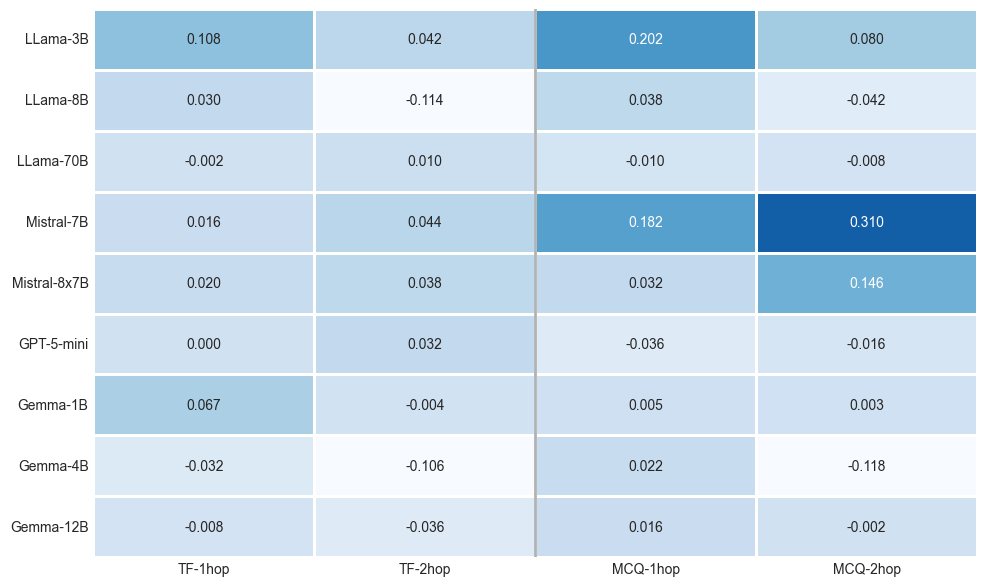

In [9]:
# =============================
# Create Combined Heatmap
# =============================
print("\nGenerating Combined Heatmap...")

# Prepare data for the combined heatmap
models = ['LLama-3B', 'LLama-8B', 'LLama-70B', 'Mistral-7B', 'Mistral-8x7B', 'GPT-5-mini', 'Gemma-1B', 'Gemma-4B', 'Gemma-12B']
configurations = ['TF-1hop', 'TF-2hop', 'MCQ-1hop', 'MCQ-2hop']

# Create the improvement matrix
improvement_matrix = np.zeros((len(models), len(configurations)))
for i, model in enumerate(models):
    for j, config in enumerate(configurations):
        qtype, hop = config.split('-')
        data = results_df[(results_df['model'] == model) & 
                         (results_df['qtype'] == qtype) & 
                         (results_df['hop'] == hop)]
        if not data.empty:
            improvement_matrix[i, j] = data['Improvement'].values[0]

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap
sns.heatmap(improvement_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='Blues',  # Same Blues colormap as other heatmaps
            xticklabels=configurations, 
            yticklabels=models,
            cbar=False,  # No colorbar
            vmin=-0.1, 
            vmax=0.4,
            ax=ax, 
            linewidths=1, 
            linecolor='white',
            square=False,
            annot_kws={'fontsize': 10})

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# Add vertical line to separate TF from MCQ
ax.axvline(x=2, color='black', linewidth=2, alpha=0.3)

# Set tick labels
ax.set_xticklabels(configurations, rotation=0, ha='center', fontsize=10)
ax.set_yticklabels(models, rotation=0, fontsize=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('combined_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.savefig('combined_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Generating Side-by-side Accuracy Heatmaps...


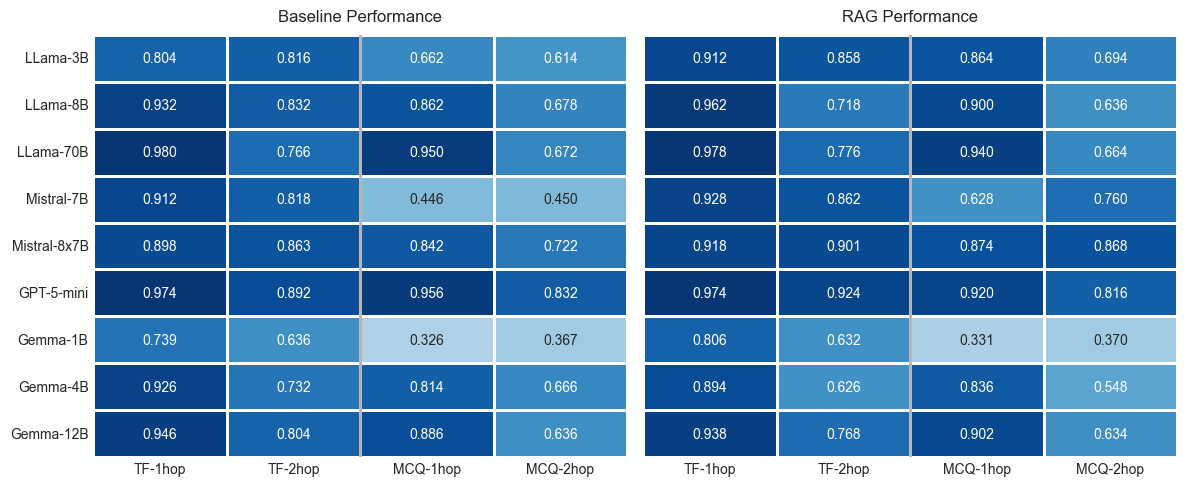

In [10]:
# =============================
# Create Side-by-side Accuracy Heatmaps
# =============================
print("\nGenerating Side-by-side Accuracy Heatmaps...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create accuracy matrices
rag_matrix = np.zeros((len(models), len(configurations)))
baseline_matrix = np.zeros((len(models), len(configurations)))

for i, model in enumerate(models):
    for j, config in enumerate(configurations):
        qtype, hop = config.split('-')
        data = results_df[(results_df['model'] == model) & 
                         (results_df['qtype'] == qtype) & 
                         (results_df['hop'] == hop)]
        if not data.empty:
            rag_matrix[i, j] = data['RAG'].values[0]
            baseline_matrix[i, j] = data['Simple'].values[0]

# Baseline Heatmap - using Blues like RAGAS
sns.heatmap(baseline_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='Blues',  # Consistent with RAGAS format
            xticklabels=configurations, 
            yticklabels=models,
            cbar=False,  # No colorbar
            vmin=0, 
            vmax=1,
            ax=ax1, 
            linewidths=1, 
            linecolor='white',
            square=False,
            annot_kws={'fontsize': 10})

ax1.set_title('Baseline Performance', fontsize=12, pad=10)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axvline(x=2, color='black', linewidth=2, alpha=0.3)
ax1.set_xticklabels(configurations, rotation=0, ha='center', fontsize=10)
ax1.set_yticklabels(models, rotation=0, fontsize=10)

# Remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# RAG Heatmap - using Blues
sns.heatmap(rag_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='Blues',  # Same Blues colormap
            xticklabels=configurations, 
            yticklabels=models,
            cbar=False,  # No colorbar
            vmin=0, 
            vmax=1,
            ax=ax2, 
            linewidths=1, 
            linecolor='white',
            square=False,
            annot_kws={'fontsize': 10})

ax2.set_title('RAG Performance', fontsize=12, pad=10)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticklabels([])  # Remove y-labels on second plot
ax2.axvline(x=2, color='black', linewidth=2, alpha=0.3)
ax2.set_xticklabels(configurations, rotation=0, ha='center', fontsize=10)

# Remove spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# fig.suptitle('Model Performance Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('accuracy_heatmaps.pdf', dpi=300, bbox_inches='tight')
plt.savefig('accuracy_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()


Generating Radar Charts for Each Model...


ValueError: num must be an integer with 1 <= num <= 6, not 7

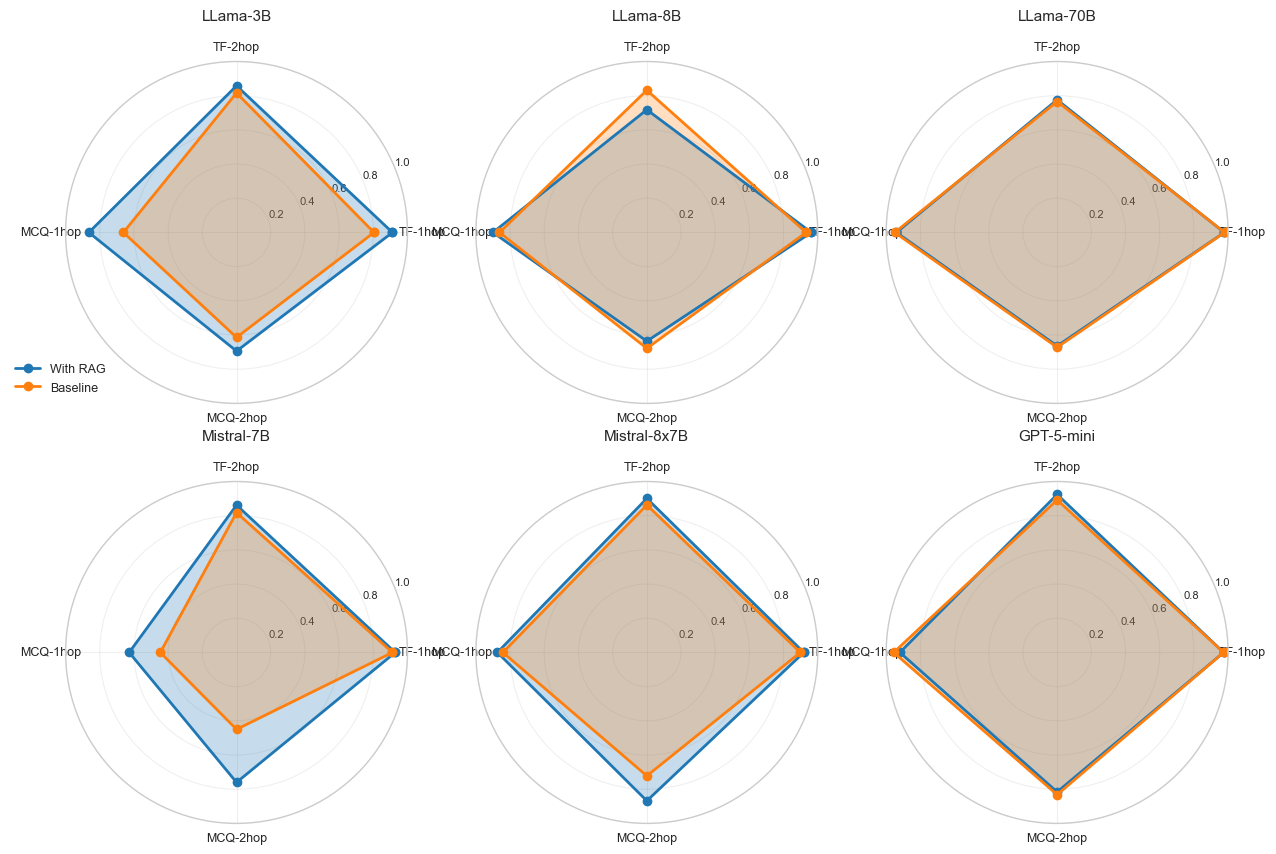

In [11]:
# =============================
# Create Multiple Radar Charts - One per Model
# =============================
import numpy as np
import matplotlib.pyplot as plt
from math import pi

print("\nGenerating Radar Charts for Each Model...")

# Categories for the radar chart (combinations of qtype and hop)
categories = ['TF-1hop', 'TF-2hop', 'MCQ-1hop', 'MCQ-2hop']
N = len(categories)

# Angles for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Create subplots - 2 rows, 3 columns for 6 models
fig = plt.figure(figsize=(15, 10))

for idx, model in enumerate(models):
    ax = fig.add_subplot(2, 3, idx + 1, projection='polar')
    
    # Collect values for both RAG and Simple
    rag_values = []
    simple_values = []
    
    for cat in categories:
        qtype, hop = cat.split('-')
        data = results_df[(results_df['model'] == model) & 
                         (results_df['qtype'] == qtype) & 
                         (results_df['hop'] == hop)]
        if not data.empty:
            rag_values.append(data['RAG'].values[0])
            simple_values.append(data['Simple'].values[0])
        else:
            rag_values.append(0)
            simple_values.append(0)
    
    # Complete the circle
    rag_values += rag_values[:1]
    simple_values += simple_values[:1]
    
    # Plot RAG performance
    ax.plot(angles, rag_values, 'o-', linewidth=2, label='With RAG', color='#1f77b4', markersize=6)
    ax.fill(angles, rag_values, alpha=0.25, color='#1f77b4')
    
    # Plot Baseline performance
    ax.plot(angles, simple_values, 'o-', linewidth=2, label='Baseline', color='#ff7f0e', markersize=6)
    ax.fill(angles, simple_values, alpha=0.25, color='#ff7f0e')
    
    # Fix axis to go in the right order
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_ylim(0, 1)
    
    # Add gridlines
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=8)
    ax.grid(True, alpha=0.3)
    
    # Title for each subplot
    ax.set_title(model, fontsize=11, pad=15)
    
    # Add legend to first subplot
    if idx == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(0.15, 0.15), fontsize=9)

# fig.suptitle('Model Performance: Baseline vs RAG Across Task Configurations', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('radar_charts_per_model.pdf', dpi=300, bbox_inches='tight')
plt.savefig('radar_charts_per_model.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
def calculate_error_reduction(simple_acc, rag_acc):
    """Calculate error reduction rate"""
    if simple_acc == 1.0:
        return 0.0
    error_reduction = (1 - rag_acc) - (1 - simple_acc)
    relative_reduction = -error_reduction / (1 - simple_acc)
    return relative_reduction

def calculate_comprehensive_metrics(df, model_name, qtype='TF'):
    """Calculate comprehensive metrics including confidence intervals"""
    metrics = {}
    
    if qtype == "TF":
        answer_col = 'answer'
    else:
        answer_col = 'standardized_answer'
    
    # RAG metrics
    valid_mask = ~pd.isna(df[answer_col]) & ~pd.isna(df['with_context_parsed'])
    y_true_rag = df.loc[valid_mask, answer_col].astype(str).str.lower()
    y_pred_rag = df.loc[valid_mask, 'with_context_parsed'].astype(str).str.lower()
    
    # Simple metrics
    valid_mask_simple = ~pd.isna(df[answer_col]) & ~pd.isna(df['without_context_parsed'])
    y_true_simple = df.loc[valid_mask_simple, answer_col].astype(str).str.lower()
    y_pred_simple = df.loc[valid_mask_simple, 'without_context_parsed'].astype(str).str.lower()
    
    # Calculate all metrics
    metrics['rag_accuracy'] = accuracy_score(y_true_rag, y_pred_rag)
    metrics['simple_accuracy'] = accuracy_score(y_true_simple, y_pred_simple)
    metrics['accuracy_improvement'] = metrics['rag_accuracy'] - metrics['simple_accuracy']
    metrics['error_reduction'] = calculate_error_reduction(metrics['simple_accuracy'], metrics['rag_accuracy'])
    
    # Calculate additional metrics for binary classification
    if qtype == "TF":
        metrics['rag_precision'] = precision_score(y_true_rag, y_pred_rag, pos_label='true', average='binary')
        metrics['rag_recall'] = recall_score(y_true_rag, y_pred_rag, pos_label='true', average='binary')
        metrics['rag_f1'] = f1_score(y_true_rag, y_pred_rag, pos_label='true', average='binary')
        
        metrics['simple_precision'] = precision_score(y_true_simple, y_pred_simple, pos_label='true', average='binary')
        metrics['simple_recall'] = recall_score(y_true_simple, y_pred_simple, pos_label='true', average='binary')
        metrics['simple_f1'] = f1_score(y_true_simple, y_pred_simple, pos_label='true', average='binary')
    
    # Sample size
    metrics['n_samples'] = len(y_true_rag)
    
    # Calculate confidence intervals using binomial confidence interval
    from statsmodels.stats.proportion import proportion_confint
    ci_rag = proportion_confint(metrics['rag_accuracy'] * metrics['n_samples'], 
                                 metrics['n_samples'], 
                                 method='wilson')
    ci_simple = proportion_confint(metrics['simple_accuracy'] * metrics['n_samples'], 
                                    metrics['n_samples'], 
                                    method='wilson')
    
    metrics['rag_ci_lower'] = ci_rag[0]
    metrics['rag_ci_upper'] = ci_rag[1]
    metrics['simple_ci_lower'] = ci_simple[0]
    metrics['simple_ci_upper'] = ci_simple[1]
    
    return metrics

In [16]:
# =============================
# STATISTICAL SIGNIFICANCE TESTS
# =============================

def mcnemar_test(df, qtype='TF'):
    """Perform McNemar's test for paired binary outcomes"""
    if qtype == "TF":
        answer_col = 'answer'
    else:
        answer_col = 'standardized_answer'
    
    valid_mask = ~pd.isna(df[answer_col]) & ~pd.isna(df['with_context_parsed']) & ~pd.isna(df['without_context_parsed'])
    y_true = df.loc[valid_mask, answer_col].astype(str).str.lower()
    y_pred_rag = df.loc[valid_mask, 'with_context_parsed'].astype(str).str.lower()
    y_pred_simple = df.loc[valid_mask, 'without_context_parsed'].astype(str).str.lower()
    
    # Create contingency table
    rag_correct = y_pred_rag == y_true
    simple_correct = y_pred_simple == y_true
    
    # Count cases
    both_correct = sum(rag_correct & simple_correct)
    only_rag = sum(rag_correct & ~simple_correct)
    only_simple = sum(~rag_correct & simple_correct)
    both_wrong = sum(~rag_correct & ~simple_correct)
    
    # McNemar's test statistic
    if only_rag + only_simple == 0:
        return {'statistic': 0, 'p_value': 1.0, 'only_rag': only_rag, 'only_simple': only_simple}
    
    from statsmodels.stats.contingency_tables import mcnemar
    table = [[both_correct, only_simple], [only_rag, both_wrong]]
    result = mcnemar(table, exact=True)
    
    return {
        'statistic': result.statistic,
        'p_value': result.pvalue,
        'only_rag_correct': only_rag,
        'only_simple_correct': only_simple,
        'both_correct': both_correct,
        'both_wrong': both_wrong
    }

In [17]:
# =============================
# COLLECT ENHANCED METRICS
# =============================

print("Collecting comprehensive metrics...")
detailed_results = []

for model, qtypes in csv_paths.items():
    for qtype, hops in qtypes.items():
        for hop, path in hops.items():
            print(f"Processing: {model} - {qtype} - {hop}")
            
            try:
                df = pd.read_csv(path)
                
                # Get comprehensive metrics
                metrics = calculate_comprehensive_metrics(df, model, qtype)
                
                # Get McNemar test results
                mcnemar_results = mcnemar_test(df, qtype)
                
                # Combine all metrics
                result = {
                    'model': model,
                    'qtype': qtype,
                    'hop': hop,
                    'dataset': f"{qtype}-{hop}",
                    **metrics,
                    **mcnemar_results
                }
                
                detailed_results.append(result)
                
            except Exception as e:
                print(f"  Error processing {path}: {str(e)}")

detailed_df = pd.DataFrame(detailed_results)

Processing: LLama-3B - TF - 1hop
Processing: LLama-3B - TF - 2hop
Processing: LLama-3B - MCQ - 1hop
Processing: LLama-3B - MCQ - 2hop
Processing: LLama-8B - TF - 1hop
Processing: LLama-8B - TF - 2hop
Processing: LLama-8B - MCQ - 1hop
Processing: LLama-8B - MCQ - 2hop
Processing: LLama-70B - TF - 1hop
Processing: LLama-70B - TF - 2hop
Processing: LLama-70B - MCQ - 1hop
Processing: LLama-70B - MCQ - 2hop
Processing: Mistral-7B - TF - 1hop
Processing: Mistral-7B - TF - 2hop
Processing: Mistral-7B - MCQ - 1hop
Processing: Mistral-7B - MCQ - 2hop
Processing: Mistral-8x7B - TF - 1hop
Processing: Mistral-8x7B - TF - 2hop
Processing: Mistral-8x7B - MCQ - 1hop
Processing: Mistral-8x7B - MCQ - 2hop
Processing: GPT-5-mini - TF - 1hop
Processing: GPT-5-mini - TF - 2hop
Processing: GPT-5-mini - MCQ - 1hop
Processing: GPT-5-mini - MCQ - 2hop
Processing: Gemma-1B - TF - 1hop
Processing: Gemma-1B - TF - 2hop
Processing: Gemma-1B - MCQ - 1hop
Processing: Gemma-1B - MCQ - 2hop
Processing: Gemma-4B - TF 


Figure 1: Error Reduction Heatmap


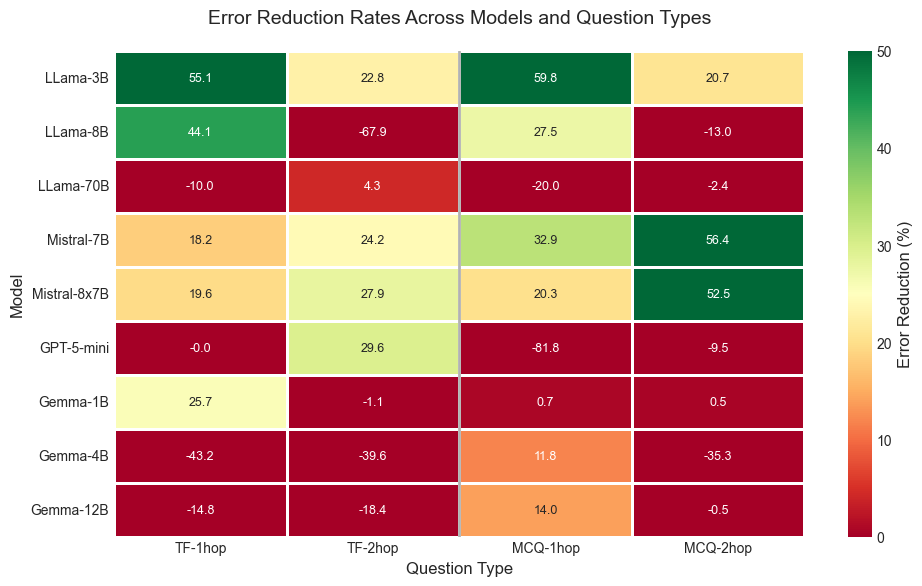

In [18]:
# =============================
# FIGURE 1: Error Reduction Heatmap
# =============================

print("\nFigure 1: Error Reduction Heatmap")
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare error reduction matrix
error_matrix = np.zeros((len(models), len(configurations)))
for i, model in enumerate(models):
    for j, config in enumerate(configurations):
        qtype, hop = config.split('-')
        data = detailed_df[(detailed_df['model'] == model) & 
                          (detailed_df['qtype'] == qtype) & 
                          (detailed_df['hop'] == hop)]
        if not data.empty:
            error_matrix[i, j] = data['error_reduction'].values[0] * 100

# Create heatmap with annotations
sns.heatmap(error_matrix, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn',
            xticklabels=configurations, 
            yticklabels=models,
            cbar_kws={'label': 'Error Reduction (%)'},
            vmin=0, 
            vmax=50,
            ax=ax,
            linewidths=1,
            linecolor='white',
            annot_kws={'fontsize': 9})

ax.set_title('Error Reduction Rates Across Models and Question Types', fontsize=14, pad=20)
ax.set_xlabel('Question Type', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.axvline(x=2, color='black', linewidth=2, alpha=0.3)

plt.tight_layout()
plt.savefig('error_reduction_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.show()


Figure 2: Performance by Question Complexity


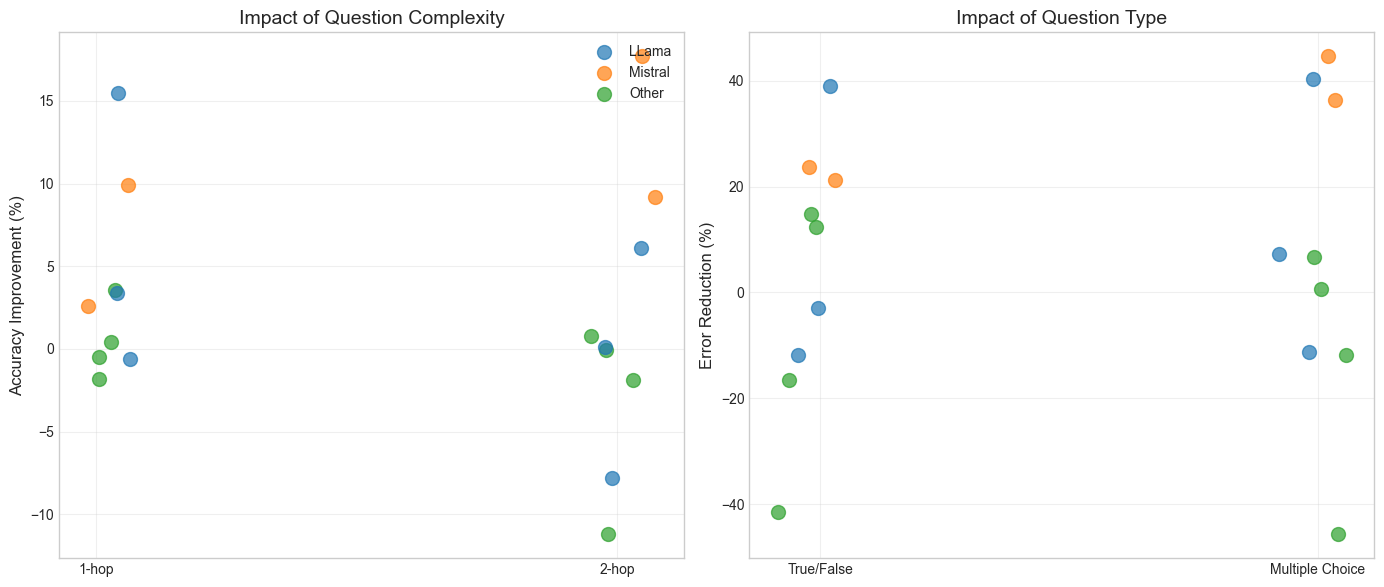

In [19]:
# =============================
# FIGURE 2: Model Performance by Complexity
# =============================

print("\nFigure 2: Performance by Question Complexity")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Accuracy improvement by hop count
hop_data = detailed_df.groupby(['model', 'hop']).agg({
    'accuracy_improvement': 'mean',
    'error_reduction': 'mean'
}).reset_index()

# Model groups for coloring
model_families = {
    'LLama': ['LLama-3B', 'LLama-8B', 'LLama-70B'],
    'Mistral': ['Mistral-7B', 'Mistral-8x7B'],
    'Other': ['GPT-5-mini', 'Gemma-1B', 'Gemma-4B', 'Gemma-12B']
}

colors = {'LLama': '#1f77b4', 'Mistral': '#ff7f0e', 'Other': '#2ca02c'}

for hop in ['1hop', '2hop']:
    data = hop_data[hop_data['hop'] == hop]
    x = 0.8 if hop == '1hop' else 1.2
    
    for _, row in data.iterrows():
        model = row['model']
        family = [k for k, v in model_families.items() if model in v][0]
        axes[0].scatter(x + np.random.normal(0, 0.02), 
                       row['accuracy_improvement'] * 100,
                       color=colors[family], 
                       alpha=0.7, 
                       s=100)

axes[0].set_xticks([0.8, 1.2])
axes[0].set_xticklabels(['1-hop', '2-hop'])
axes[0].set_ylabel('Accuracy Improvement (%)', fontsize=12)
axes[0].set_title('Impact of Question Complexity', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Add legend for model families
for family, color in colors.items():
    axes[0].scatter([], [], color=color, label=family, s=100, alpha=0.7)
axes[0].legend(loc='upper right')

# Subplot 2: TF vs MCQ performance
qtype_data = detailed_df.groupby(['model', 'qtype']).agg({
    'accuracy_improvement': 'mean',
    'error_reduction': 'mean'
}).reset_index()

for qtype in ['TF', 'MCQ']:
    data = qtype_data[qtype_data['qtype'] == qtype]
    x = 0.8 if qtype == 'TF' else 1.2
    
    for _, row in data.iterrows():
        model = row['model']
        family = [k for k, v in model_families.items() if model in v][0]
        axes[1].scatter(x + np.random.normal(0, 0.02), 
                       row['error_reduction'] * 100,
                       color=colors[family], 
                       alpha=0.7, 
                       s=100)

axes[1].set_xticks([0.8, 1.2])
axes[1].set_xticklabels(['True/False', 'Multiple Choice'])
axes[1].set_ylabel('Error Reduction (%)', fontsize=12)
axes[1].set_title('Impact of Question Type', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('complexity_analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()


Figure 3: Statistical Significance Matrix


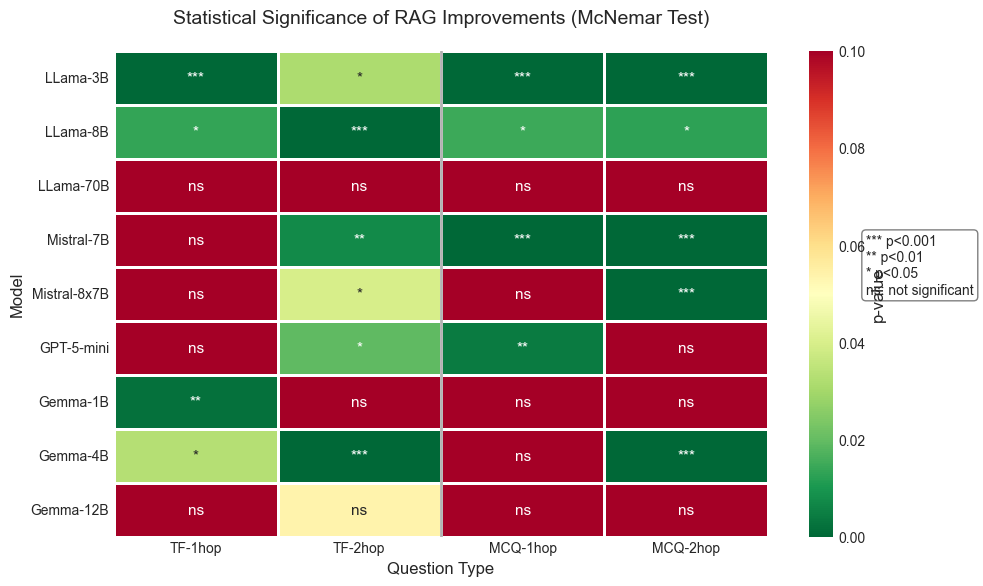

In [20]:
# =============================
# FIGURE 3: Statistical Significance
# =============================

print("\nFigure 3: Statistical Significance Matrix")
fig, ax = plt.subplots(figsize=(10, 6))

# Create p-value matrix
p_matrix = np.zeros((len(models), len(configurations)))
for i, model in enumerate(models):
    for j, config in enumerate(configurations):
        qtype, hop = config.split('-')
        data = detailed_df[(detailed_df['model'] == model) & 
                          (detailed_df['qtype'] == qtype) & 
                          (detailed_df['hop'] == hop)]
        if not data.empty:
            p_matrix[i, j] = data['p_value'].values[0]

# Create custom annotations with significance stars
annot_matrix = np.empty((len(models), len(configurations)), dtype=object)
for i in range(len(models)):
    for j in range(len(configurations)):
        p = p_matrix[i, j]
        if p < 0.001:
            annot_matrix[i, j] = '***'
        elif p < 0.01:
            annot_matrix[i, j] = '**'
        elif p < 0.05:
            annot_matrix[i, j] = '*'
        else:
            annot_matrix[i, j] = 'ns'

sns.heatmap(p_matrix, 
            annot=annot_matrix,
            fmt='',
            cmap='RdYlGn_r',
            xticklabels=configurations, 
            yticklabels=models,
            cbar_kws={'label': 'p-value'},
            vmin=0,
            vmax=0.1,
            ax=ax,
            linewidths=1,
            linecolor='white')

ax.set_title('Statistical Significance of RAG Improvements (McNemar Test)', fontsize=14, pad=20)
ax.set_xlabel('Question Type', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.axvline(x=2, color='black', linewidth=2, alpha=0.3)

# Add legend
legend_text = '*** p<0.001\n** p<0.01\n* p<0.05\nns: not significant'
ax.text(1.15, 0.5, legend_text, transform=ax.transAxes, fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.savefig('significance_matrix.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# =============================
# TABLE 1: Summary Statistics
# =============================

print("\n" + "="*80)
print("TABLE 1: Overall Performance Summary")
print("="*80)

summary_stats = detailed_df.groupby('model').agg({
    'simple_accuracy': 'mean',
    'rag_accuracy': 'mean',
    'accuracy_improvement': 'mean',
    'error_reduction': 'mean'
}).round(3)

summary_stats['Rank'] = summary_stats['error_reduction'].rank(ascending=False).astype(int)
summary_stats = summary_stats.sort_values('Rank')

# Format for paper
summary_stats['Simple Acc'] = (summary_stats['simple_accuracy'] * 100).round(1).astype(str) + '%'
summary_stats['RAG Acc'] = (summary_stats['rag_accuracy'] * 100).round(1).astype(str) + '%'
summary_stats['Acc Gain'] = '+' + (summary_stats['accuracy_improvement'] * 100).round(1).astype(str) + '%'
summary_stats['Error↓'] = (summary_stats['error_reduction'] * 100).round(1).astype(str) + '%'

print(summary_stats[['Rank', 'Simple Acc', 'RAG Acc', 'Acc Gain', 'Error↓']].to_string())

# Save to LaTeX
latex_table = summary_stats[['Rank', 'Simple Acc', 'RAG Acc', 'Acc Gain', 'Error↓']].to_latex(
    caption="Overall model performance with RAG integration",
    label="tab:overall_performance",
    escape=False
)

with open('table_overall_performance.tex', 'w') as f:
    f.write(latex_table)


TABLE 1: Overall Performance Summary
              Rank Simple Acc RAG Acc Acc Gain  Error↓
model                                                 
LLama-3B         1      72.4%   83.2%   +10.8%   39.6%
Mistral-7B       2      65.6%   79.4%   +13.8%   32.9%
Mistral-8x7B     3      83.1%   89.0%    +5.9%   30.1%
Gemma-1B         4      51.7%   53.5%    +1.8%    6.4%
LLama-8B         5      82.6%   80.4%   +-2.2%   -2.3%
Gemma-12B        6      81.8%   81.0%   +-0.8%   -4.9%
LLama-70B        7      84.2%   84.0%   +-0.3%   -7.0%
GPT-5-mini       8      91.4%   90.8%   +-0.5%  -15.4%
Gemma-4B         9      78.4%   72.6%   +-5.8%  -26.6%


In [22]:
# =============================
# TABLE 2: Detailed Performance by Question Type
# =============================

print("\n" + "="*80)
print("TABLE 2: Performance by Question Type and Complexity")
print("="*80)

pivot_table = detailed_df.pivot_table(
    values='error_reduction',
    index='model',
    columns='dataset',
    aggfunc='first'
).round(3)

# Format for paper
for col in pivot_table.columns:
    pivot_table[col] = (pivot_table[col] * 100).round(1).astype(str) + '%'

print(pivot_table.to_string())

# Save to LaTeX
latex_detailed = pivot_table.to_latex(
    caption="Error reduction rates across all experimental conditions",
    label="tab:detailed_performance",
    escape=False
)

with open('table_detailed_performance.tex', 'w') as f:
    f.write(latex_detailed)


TABLE 2: Performance by Question Type and Complexity
dataset      MCQ-1hop MCQ-2hop TF-1hop TF-2hop
model                                         
GPT-5-mini     -81.8%    -9.5%   -0.0%   29.6%
Gemma-12B       14.0%    -0.5%  -14.8%  -18.4%
Gemma-1B         0.7%     0.5%   25.7%   -1.1%
Gemma-4B        11.8%   -35.3%  -43.2%  -39.6%
LLama-3B        59.8%    20.7%   55.1%   22.8%
LLama-70B      -20.0%    -2.4%  -10.0%    4.3%
LLama-8B        27.5%   -13.0%   44.1%  -67.9%
Mistral-7B      32.9%    56.4%   18.2%   24.2%
Mistral-8x7B    20.3%    52.5%   19.6%   27.9%



Figure 4: Model Size vs Performance


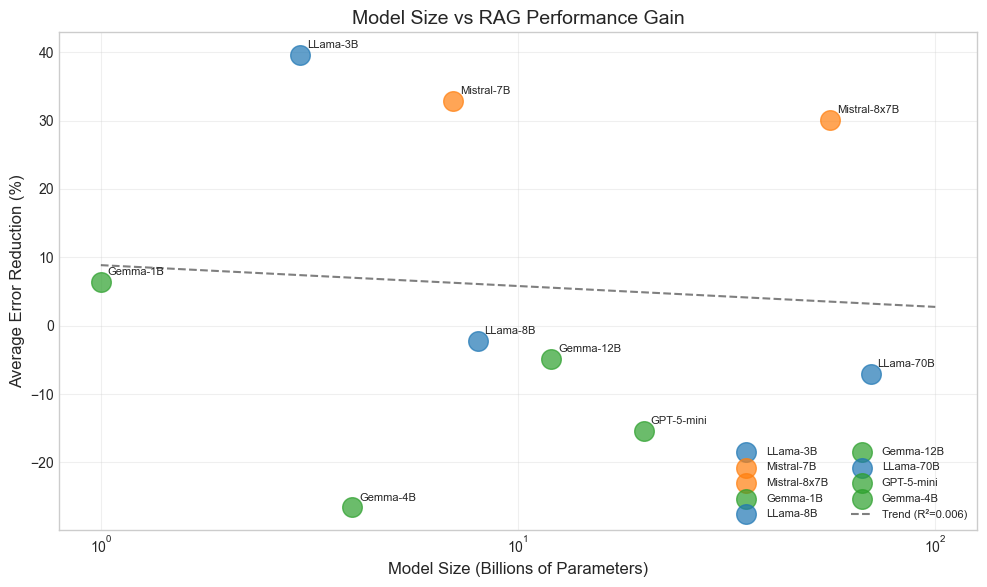

In [23]:
# =============================
# FIGURE 4: Model Size Analysis (if applicable)
# =============================

print("\nFigure 4: Model Size vs Performance")

# Define model sizes (in billions of parameters)
model_sizes = {
    'Gemma-1B': 1,
    'LLama-3B': 3,
    'Gemma-4B': 4,
    'Mistral-7B': 7,
    'LLama-8B': 8,
    'Gemma-12B': 12,
    'Mistral-8x7B': 56,  # Mixture of experts
    'LLama-70B': 70,
    'GPT-5-mini': 20  # Approximate
}

# Add model size to dataframe
size_analysis = summary_stats.copy()
size_analysis['size'] = size_analysis.index.map(model_sizes)
size_analysis = size_analysis.dropna(subset=['size'])

fig, ax = plt.subplots(figsize=(10, 6))

# Plot error reduction vs model size
for model in size_analysis.index:
    family = [k for k, v in model_families.items() if model in v][0]
    ax.scatter(size_analysis.loc[model, 'size'],
              size_analysis.loc[model, 'error_reduction'] * 100,
              color=colors[family],
              s=200,
              alpha=0.7,
              label=model)

ax.set_xscale('log')
ax.set_xlabel('Model Size (Billions of Parameters)', fontsize=12)
ax.set_ylabel('Average Error Reduction (%)', fontsize=12)
ax.set_title('Model Size vs RAG Performance Gain', fontsize=14)
ax.grid(True, alpha=0.3)

# Add trend line
from scipy.stats import linregress
x = np.log10(size_analysis['size'].values)
y = size_analysis['error_reduction'].values * 100
slope, intercept, r_value, p_value, std_err = linregress(x, y)

x_trend = np.logspace(np.log10(1), np.log10(100), 100)
y_trend = slope * np.log10(x_trend) + intercept
ax.plot(x_trend, y_trend, 'k--', alpha=0.5, label=f'Trend (R²={r_value**2:.3f})')

# Add labels for each point
for model in size_analysis.index:
    ax.annotate(model, 
               (size_analysis.loc[model, 'size'], 
                size_analysis.loc[model, 'error_reduction'] * 100),
               xytext=(5, 5), 
               textcoords='offset points',
               fontsize=8)

plt.legend(loc='lower right', fontsize=8, ncol=2)
plt.tight_layout()
plt.savefig('model_size_analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# =============================
# SUMMARY FOR PAPER
# =============================

print("\n" + "="*80)
print("SUMMARY STATISTICS FOR PAPER")
print("="*80)

overall_stats = {
    'Total Questions': detailed_df['n_samples'].sum(),
    'Total Models': len(detailed_df['model'].unique()),
    'Avg Simple Accuracy': f"{detailed_df['simple_accuracy'].mean()*100:.1f}%",
    'Avg RAG Accuracy': f"{detailed_df['rag_accuracy'].mean()*100:.1f}%",
    'Avg Accuracy Gain': f"+{detailed_df['accuracy_improvement'].mean()*100:.1f}%",
    'Avg Error Reduction': f"{detailed_df['error_reduction'].mean()*100:.1f}%",
    'Best Error Reduction': f"{detailed_df['error_reduction'].max()*100:.1f}%",
    'Significant Results (p<0.05)': f"{(detailed_df['p_value'] < 0.05).sum()}/{len(detailed_df)}",
    'Highly Significant (p<0.001)': f"{(detailed_df['p_value'] < 0.001).sum()}/{len(detailed_df)}"
}

for key, value in overall_stats.items():
    print(f"{key}: {value}")

# Compare 1-hop vs 2-hop
print("\n1-hop vs 2-hop Performance:")
hop_comparison = detailed_df.groupby('hop')['error_reduction'].mean() * 100
print(f"1-hop avg error reduction: {hop_comparison['1hop']:.1f}%")
print(f"2-hop avg error reduction: {hop_comparison['2hop']:.1f}%")
print(f"Difference: {hop_comparison['1hop'] - hop_comparison['2hop']:.1f}%")

# Compare TF vs MCQ
print("\nTrue/False vs Multiple Choice:")
qtype_comparison = detailed_df.groupby('qtype')['error_reduction'].mean() * 100
print(f"TF avg error reduction: {qtype_comparison['TF']:.1f}%")
print(f"MCQ avg error reduction: {qtype_comparison['MCQ']:.1f}%")
print(f"Difference: {qtype_comparison['TF'] - qtype_comparison['MCQ']:.1f}%")

print("\n" + "="*80)
print("Analysis complete! Generated files:")
print("- error_reduction_heatmap.pdf")
print("- complexity_analysis.pdf")
print("- significance_matrix.pdf")
print("- model_size_analysis.pdf")
print("- confidence_intervals.pdf")
print("- table_overall_performance.tex")
print("- table_detailed_performance.tex")
print("="*80)


SUMMARY STATISTICS FOR PAPER
Total Questions: 17994
Total Models: 9
Avg Simple Accuracy: 76.8%
Avg RAG Accuracy: 79.3%
Avg Accuracy Gain: +2.5%
Avg Error Reduction: 5.9%
Best Error Reduction: 59.8%
Significant Results (p<0.05): 19/36
Highly Significant (p<0.001): 9/36

1-hop vs 2-hop Performance:
1-hop avg error reduction: 8.9%
2-hop avg error reduction: 2.8%
Difference: 6.0%

True/False vs Multiple Choice:
TF avg error reduction: 4.3%
MCQ avg error reduction: 7.5%
Difference: -3.2%

Analysis complete! Generated files:
- error_reduction_heatmap.pdf
- complexity_analysis.pdf
- significance_matrix.pdf
- model_size_analysis.pdf
- confidence_intervals.pdf
- table_overall_performance.tex
- table_detailed_performance.tex
